# Eyeglasses

In [1]:
from src.distance        import *
from src.datasets        import *
from src.DTM_filtrations import *
from sklearn.manifold    import MDS
from ripser              import Rips
import matplotlib.pyplot as plt
import gudhi

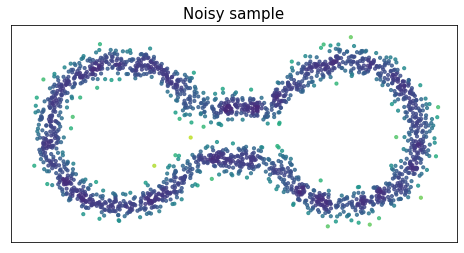

In [9]:
data = np.loadtxt('data/eyeglasses.txt')
#data generated with the function eyeglasses(2000, 0, 'normal', 0.1)
#you can also generate different samples of the eyeglasses dataset with the function eyeglasses(n_obs, n_out, type_noise, var)

cmap = plt.get_cmap('viridis')
new_cmap = truncate_colormap(cmap, minval=0.1, maxval=0.9, n=100)

' Compute the DTM on the point cloud' 
m = 0.01      
DTM_values = DTM(data,data,m) 

# plot of the DTM
fig = plt.figure(figsize = (8,4))
plot=plt.scatter(data[:,0], data[:,1], c=DTM_values, s = 10, alpha = 0.8, cmap = new_cmap)
plt.xticks([])
plt.yticks([])
plt.axis([-3,3, -1.5, 1.5])
plt.title('Noisy sample', fontsize=15)
plt.show()

## 1. Embeddings

### Isomap

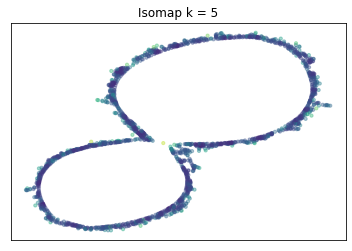

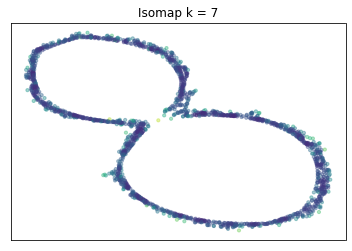

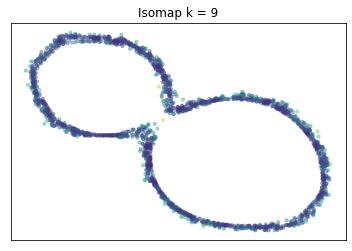

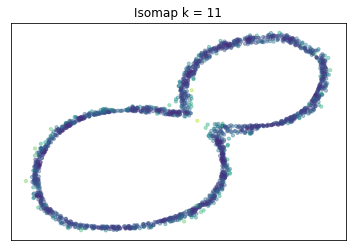

In [15]:
embedding = MDS(n_components=2, dissimilarity='precomputed')

for i,k in enumerate(range(5,12,2)):
    data_transformed = embedding.fit_transform(compute_kNN_distance(data, k))
    fig = plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.scatter(data_transformed[:,0], data_transformed[:,1], c=DTM_values, s=10, alpha = 0.4, cmap = new_cmap)
    plt.title('Isomap k = %s'%(k))

### Multidimensional Scaling with Fermat distance

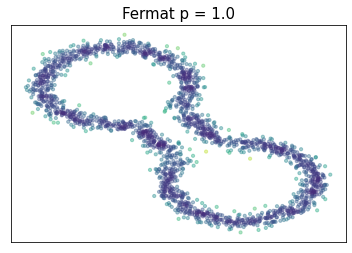

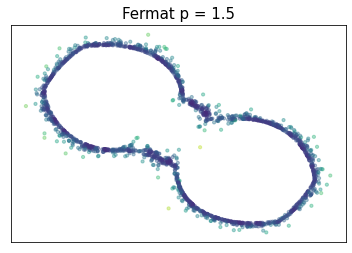

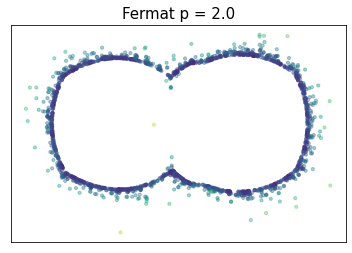

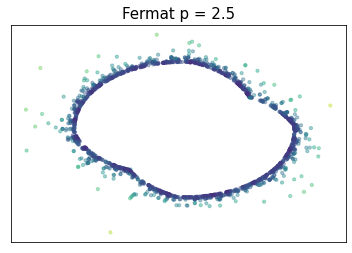

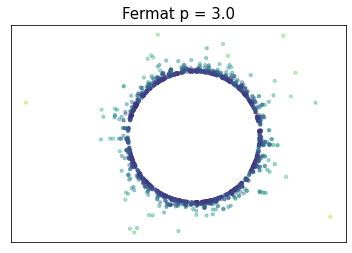

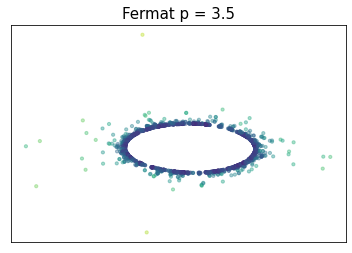

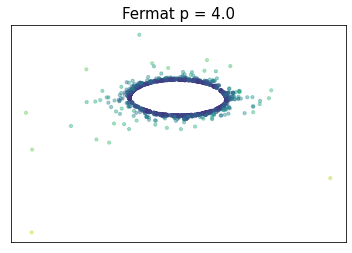

In [16]:
embedding = MDS(n_components=2, dissimilarity='precomputed')

for p in np.linspace(1,4,7):
    data_transformed = embedding.fit_transform(compute_fermat_distance(data, p))
    fig = plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.scatter(data_transformed[:,0], data_transformed[:,1], c=DTM_values, alpha=0.4, s=10, cmap = new_cmap)
    plt.title('Fermat p = %s'%(p), fontsize=15)

## 2. Persistent Homology

We compute persistent homology of the noisy sample of the eyeglasses curve for different choices of metric space structure.

#### Euclidean Distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


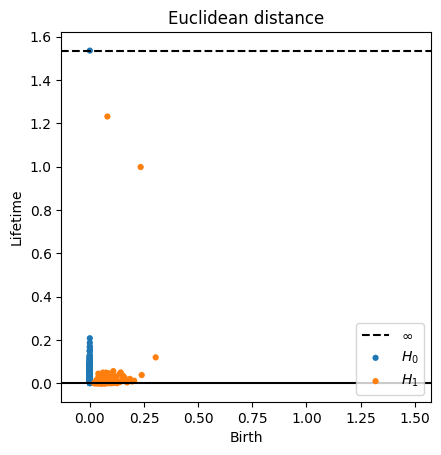

In [24]:
rips = Rips()
dgms = rips.fit_transform(data)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean distance');

#### k-NN distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


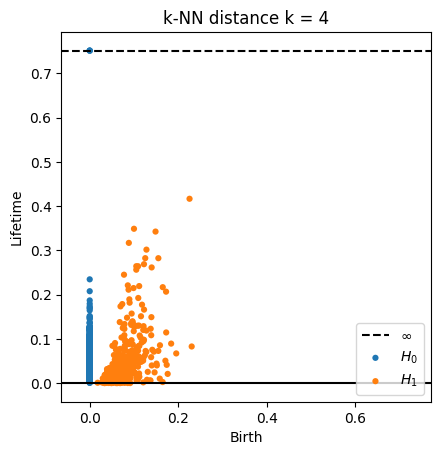

In [18]:
k=4
distance_matrix = compute_kNN_distance(data, k)
rips = Rips()
dgms = rips.fit_transform(distance_matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.title('k-NN distance k = %s'%(k));

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


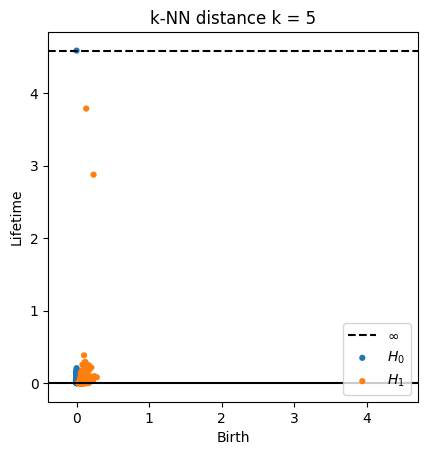

In [19]:
k=5
distance_matrix = compute_kNN_distance(data, k)
rips = Rips()
dgms = rips.fit_transform(distance_matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.title('k-NN distance k = %s'%(k));

#### Fermat Distance

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


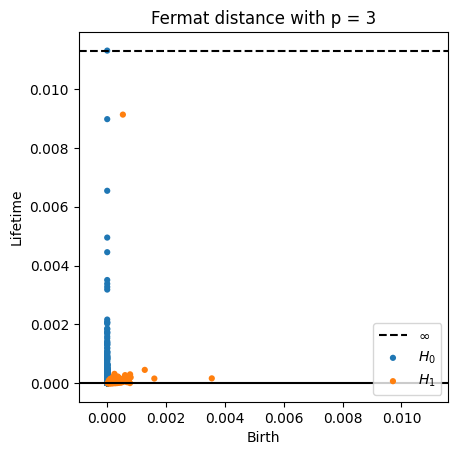

In [20]:
dgms3 = Fermat_dgm(data, p=3)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


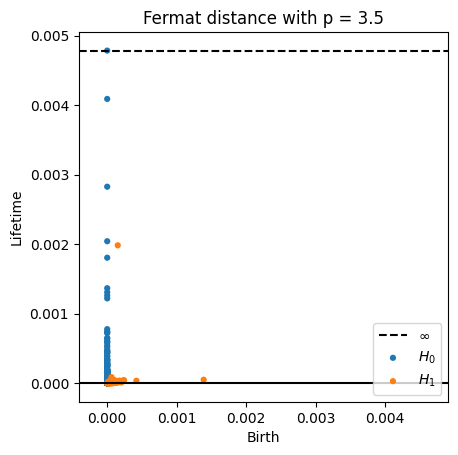

In [21]:
dgms35 = Fermat_dgm(data, p=3.5)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


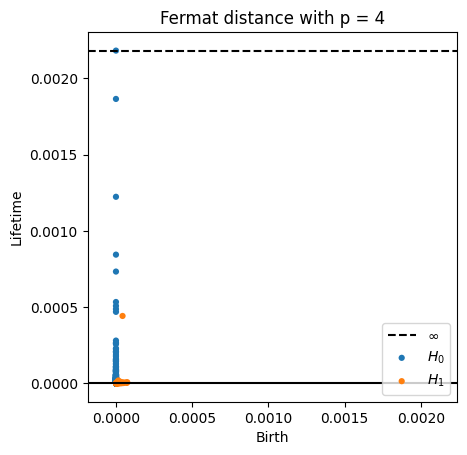

In [22]:
dgms4 = Fermat_dgm(data, p=4)

#### DTM

Alpha Weighted Rips Complex is of dimension 2 - 11982 simplices - 2000 vertices. Filtration maximal value is inf.
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


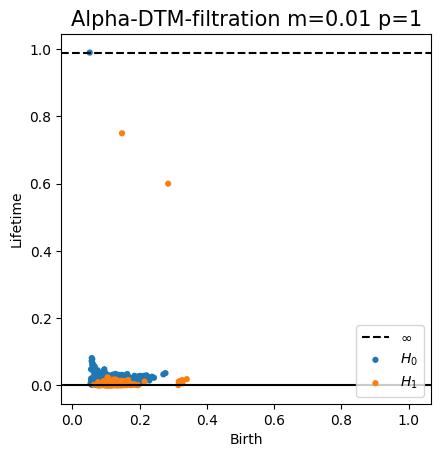

In [23]:
m = 0.01
p = 1
dimension_max = 2

# compute the persistence diagram
simplex_tree_DTM_alpha = AlphaDTMFiltration(data, m, p, dimension_max)
diagram_DTM_alpha = simplex_tree_DTM_alpha.persistence()    

# plot the persistence diagram
rips = Rips()
rips.plot(gudhi_to_ripser(diagram_DTM_alpha), lifetime = True)
plt.title('Alpha-DTM-filtration m=0.01 p=1', size = 15);

## 3. Reach vs Convexity radius

We compare the lifetime of salient generators in persistent homology for ambien and intrinsic filtrations.

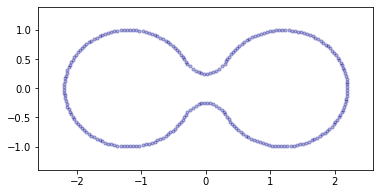

In [9]:
eyeglasses_1 = np.loadtxt('eyeglasses_tight.txt')
figure, ax = plt.subplots(figsize=(6,3))
plt.scatter(eyeglasses_1[:,0],eyeglasses_1[:,1], s=10, alpha=0.3, color='darkblue')
ax.set_xlim(-2.6,2.6)
ax.set_ylim(-1.4,1.4)
plt.show()

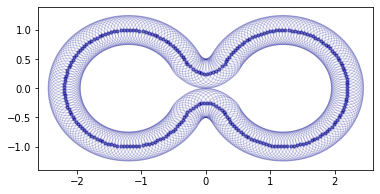

In [63]:
figure, ax = plt.subplots(figsize=(6,3))
for j in range(np.shape(eyeglasses_1)[0]):
    circle = plt.Circle((eyeglasses_1[j,0], eyeglasses_1[j,1]), 0.25, facecolor='white', fill=False, edgecolor='darkblue', alpha=.2)
    ax.add_artist(circle)
plt.scatter(eyeglasses_1[:,0],eyeglasses_1[:,1], s=10, alpha=0.5, color='darkblue')
ax.set_xlim(-2.6,2.6)
ax.set_ylim(-1.4,1.4)

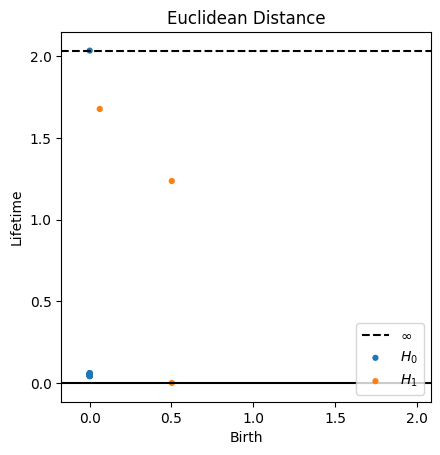

In [22]:
dgms = rips.fit_transform(eyeglasses_1)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean Distance');

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


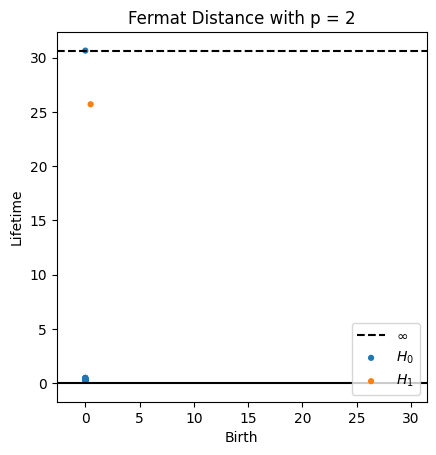

In [145]:
# numerical estimation of mu(p=2, d=1)
mu=1.9265140602860802
dgm_1 = Fermat_dgm(eyeglasses_1, p=2, rescaled=True, d=1, mu=mu)

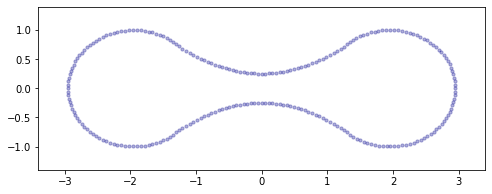

In [13]:
eyeglasses_2 = np.loadtxt('eyeglasses_long.txt')
figure, ax = plt.subplots(figsize=(8,3))
plt.scatter(eyeglasses_1[:,0],eyeglasses_1[:,1], s=10, alpha=0.3, color='darkblue')
ax.set_xlim(-3.4,3.4)
ax.set_ylim(-1.4,1.4)
plt.show()

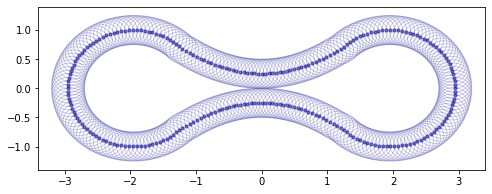

In [14]:
figure, ax = plt.subplots(figsize=(8,3))
for j in range(np.shape(eyeglasses_2)[0]):
    circle = plt.Circle((eyeglasses_2[j,0], eyeglasses_2[j,1]), 0.25, facecolor='white', fill=False, edgecolor='darkblue', alpha=.2)
    ax.add_artist(circle)
plt.scatter(eyeglasses_2[:,0],eyeglasses_2[:,1], s=10, alpha=0.5, color = 'darkblue')
ax.set_xlim(-3.4,3.4)
ax.set_ylim(-1.4,1.4)
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 895 ms, sys: 98.9 ms, total: 994 ms
Wall time: 911 ms


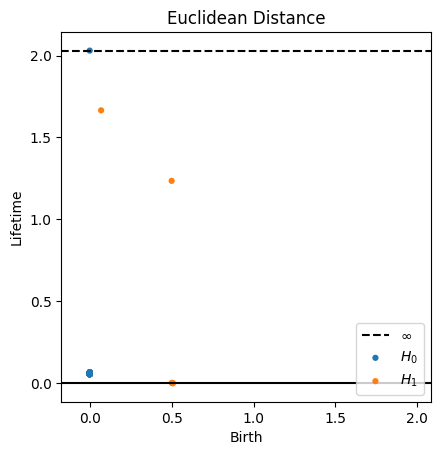

In [195]:
rips = Rips()
dgms = rips.fit_transform(eyeglasses_2)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean Distance')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


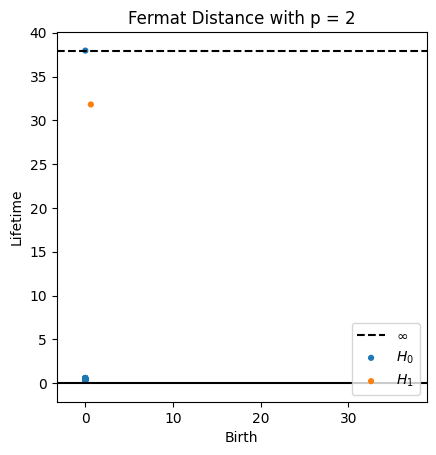

In [197]:
dgm_2 = Fermat_dgm(eyeglasses_2, p=2, rescaled = True, d=1, mu=mu)